<h1>Temperature data analysis</h1>

In [2]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [3]:
# Air temperature in celsius
path_temp_data_c = "C:/pale-blue-dot-challenge/data/g4.areaAvgTimeSeries.AIRX3STD_006_Temperature_A.500hPa.20020831-20160925.175W_60S_172E_86N.csv"
temp_data_c = pd.read_csv(path_temp_data_c, skiprows=9,  usecols=[0,1], names=['Time','Air Temperature (C)'])

# Air temperature in kelvin
path_temp_data_k = "C:/pale-blue-dot-challenge/data/g4.areaAvgTimeSeries.AIRX3STD_006_Temperature_A.500hPa.20020801-20160925.175W_60S_172E_86N_K.csv"
temp_data_k = pd.read_csv(path_temp_data_k, skiprows=9,  usecols=[0,1], names=['Time','Air Temperature (K)'])

In [4]:
temp_data_c.head()

,Time,Air Temperature (C)
0,2002-08-31,-12.705908
1,2002-09-01,-12.676642
2,2002-09-02,-12.611639
3,2002-09-03,-12.633154
4,2002-09-04,-12.806067


In [5]:
temp_data_c.tail()

,Time,Air Temperature (C)
5089,2016-09-20,-12.900000
5090,2016-09-21,-12.909765
5091,2016-09-22,-13.080816
5092,2016-09-23,-13.035253
5093,2016-09-24,-11.984503


In [6]:
temp_data_c.shape

(5094, 2)

In [7]:
px.line(temp_data_c, x="Time", y="Air Temperature (C)")

In [10]:
px.line(temp_data_k, x="Time", y="Air Temperature (K)")

<h4>Accessing MODIS temperature data with the Planetary Computer STAC API</h4>

In [4]:
import odc.stac
import planetary_computer
import pystac_client
import rich.table

In [5]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [10]:
# Coordenadas para cobrir o Brasil
latitude_min_brazil = -35
longitude_min_brazil = -75
latitude_max_brazil = 5
longitude_max_brazil = -35

# Criar a caixa delimitadora para o Brasil
bbox_brazil = [longitude_min_brazil, latitude_min_brazil, longitude_max_brazil, latitude_max_brazil]

year = "2021"
months = {
    "March": "03",
    "June": "06",
    "September": "09",
    "December": "12",
}
items = dict()

# Fetch the collection of interest and print available items
for name, number in months.items():
    datetime = f"{year}-{number}"
    search = catalog.search(
        collections=["modis-11A1-061"],
        bbox=bbox_brazil,
        datetime=datetime,
    )
    items[name] = search.item_collection()[0]

In [7]:
t = rich.table.Table("Key", "Title")
for key, asset in items["March"].assets.items():
    t.add_row(key, asset.title)
t

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key              ┃ Title                                                               ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ hdf              │ Source data containing all bands                                    │
│ QC_Day           │ Quality control for daytime LST and emissivity                      │
│ Emis_31          │ Band 31 emissivity                                                  │
│ Emis_32          │ Band 32 emissivity                                                  │
│ QC_Night         │ Quality control for nighttime LST and emissivity                    │
│ metadata         │ Federal Geographic Data Committee (FGDC) Metadata                   │
│ LST_Day_1km      │ Daily daytime 1km grid Land-surface Temperature                     │
│ Clear_day_cov    │ Day clear-sky coverage                                              │
│ Day_view_angl    │ View zenith angle of daytime Landsurface Temperature                │
│ Day_view_time    │ (local solar) Time of daytime Land-surface Temperature observation  │
│ LST_Night_1km    │ Daily nighttime 1km grid Land-surface Temperature                   │
│ Clear_night_cov  │ Night clear-sky coverage                                            │
│ Night_view_angl  │ View zenith angle of nighttime Landsurface Temperature              │
│ Night_view_time  │ (local solar) Time of nighttime Landsurface Temperature observation │
│ tilejson         │ TileJSON with default rendering                                     │
│ rendered_preview │ Rendered preview                                                    │
└──────────────────┴─────────────────────────────────────────────────────────────────────┘

In [11]:
data = odc.stac.load(
    items.values(),
    crs="EPSG:3857",
    bands="LST_Day_1km",
    resolution=500,
    bbox=bbox_brazil,
)

raster = items["March"].assets["LST_Day_1km"].extra_fields["raster:bands"]
data = data["LST_Day_1km"] * raster[0]["scale"]
data

<xarray.DataArray 'LST_Day_1km' (time: 4, y: 9443, x: 8906)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * y            (y) float64 5.572e+05 5.568e+05 ... -4.163e+06 -4.164e+06
  * x            (x) float64 -8.349e+06 -8.348e+06 ... -3.897e+06 -3.896e+06
    spatial_ref  int32 3857
  * time         (time) datetime64[ns] 2021-03-31 2021-06-30 ... 2021-12-31

C:\Users\marti\AppData\Local\Temp\ipykernel_5628\260690661.py:4: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax, datetime in zip(g.axes.flat, datetimes):


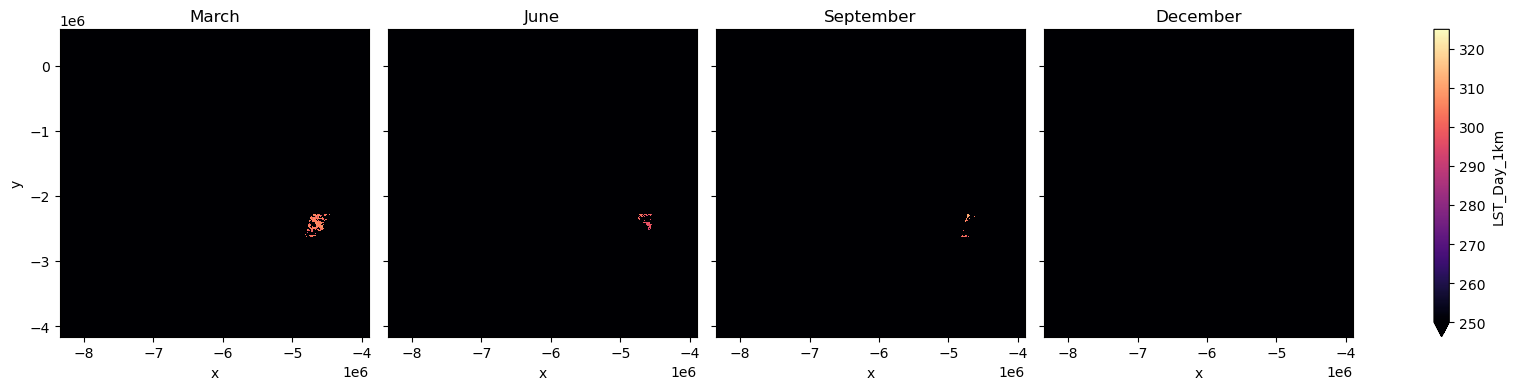

In [12]:
g = data.plot.imshow(cmap="magma", col="time", vmin=250, vmax=325, size=4)
datetimes = data.time.to_pandas().dt.strftime("%B")

for ax, datetime in zip(g.axes.flat, datetimes):
    ax.set_title(datetime)

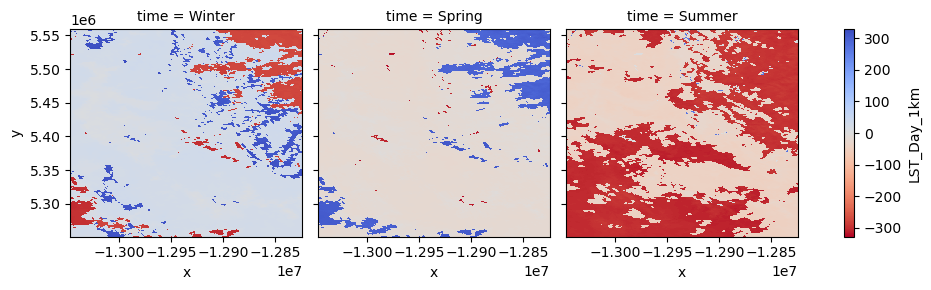

In [8]:
change = data.diff(dim="time").assign_coords(time=["Winter", "Spring", "Summer"])
change.plot.imshow(cmap="coolwarm_r", col="time");